In [32]:
import pandas as pd
import seaborn as sns
import numpy as np

In [33]:
df = pd.read_csv("reviews.csv") 

In [34]:
df.shape

(1000, 2)

In [35]:
df.sample(5)

,Description,Is_Response
16,Priceline sent us to this hotel after acceptin...,not happy
256,My wife and I stayed here for two nights as th...,happy
513,Nice facilities and a really friendly and help...,happy
396,We picked this hotel as a romantic holiday get...,happy
748,The hotel building is older but care has been ...,not happy


In [36]:
# Remove all rows with null values
df.dropna(axis=0, inplace=True)

In [37]:
df.shape

(1000, 2)

In [38]:
# Change Is_Response to 0 for no happy and 1 for happy
df['Is_Response'].replace(['happy','not happy'],['1','0'], inplace=True)

C:\Users\srika\AppData\Local\Temp\ipykernel_9504\3705502376.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Is_Response'].replace(['happy','not happy'],['1','0'], inplace=True)


In [39]:
df.sample(5)

,Description,Is_Response
96,The hotel is the closest to the LA convention ...,0
961,My husband and I were married - years ago at t...,1
909,i had handicapped family and they put us in th...,0
706,I stayed just one night at the Talbott while v...,1
608,I stayed here for a Convention. Service is qui...,0


In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

In [41]:
X = df['Description']
y = df['Is_Response']

In [42]:
# tf-idf means term-frequency times inverse document-frequency. 
tfidf = TfidfVectorizer(ngram_range=(1,1), stop_words='english')
tfidf.fit(X)
features = tfidf.transform(X)

In [43]:
features.shape

(1000, 8212)

In [44]:
#eatures.toarray()[:10,500:520]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(features,y,test_size=0.2,random_state=20)

In [46]:
clf = LogisticRegression().fit(X_train,y_train)

In [47]:
### Train accuracy
clf.score(X_train,y_train)

0.8925

In [48]:
y_pred = clf.predict(X_test)
print("Accuracy Score:",clf.score(X_test,y_test))  

Accuracy Score: 0.79


In [49]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[ 28  42]
 [  0 130]]


In [50]:
from sklearn.metrics import classification_report
print( classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.40      0.57        70
           1       0.76      1.00      0.86       130

    accuracy                           0.79       200
   macro avg       0.88      0.70      0.72       200
weighted avg       0.84      0.79      0.76       200



Text(0.5, 23.52222222222222, 'Predicted')

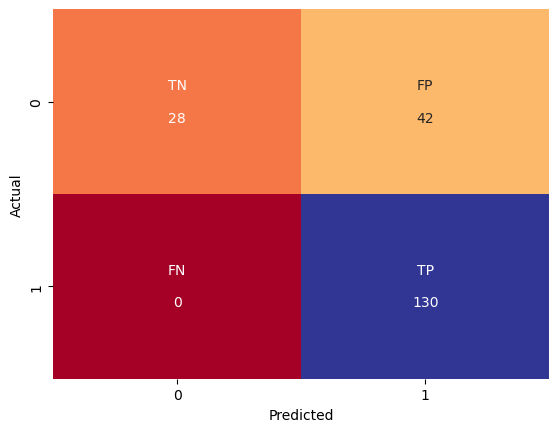

In [51]:
group_counts = [f"{value:0.0f}" for value in  cm.flatten()]
group_names = ['TN','FP', 'FN','TP']
labels = [f"{v1}\n\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.array(labels).reshape(2,2)
ax = sns.heatmap(cm, annot=labels, fmt="", cmap='RdYlBu',cbar=False)
ax.set_ylabel("Actual")
ax.set_xlabel("Predicted")

### Predict for new data

In [52]:
# tfidf.vocabulary_

In [62]:
# Predict whether the given review is positive or negative 
docs = ["This is very good",
        "Room service is not bad",
        "Food was awesome"]
# Tfidf
features = tfidf.transform(docs)
print(features.shape)
print(clf.predict(features))

(3, 8212)
['1' '0' '1']


## Text classification using BernoulliNB

In [70]:
# tf-idf means term-frequency times inverse document-frequency. 
tfidf = TfidfVectorizer(ngram_range=(1,1), stop_words='english')
features = tfidf.fit_transform(X).toarray()

In [55]:
#tfidf.vocabulary_.items()

In [71]:
features.shape

(1000, 8212)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(features,y,test_size=0.2,random_state=20)

In [73]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB().fit(X_train,y_train)

In [74]:
bnb.score(X_train,y_train)

0.84375

In [75]:
y_pred = bnb.predict(X_test)
print("Accuracy Score:",bnb.score(X_test,y_test))  

Accuracy Score: 0.745


[[ 11  59]
 [  5 125]]


Text(0.5, 23.52222222222222, 'Predicted')

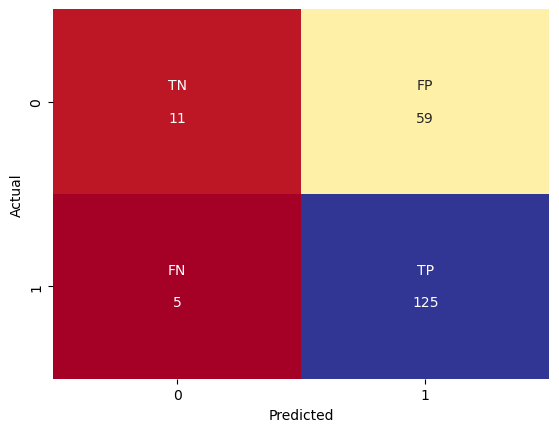

In [69]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)
group_counts = [f"{value:0.0f}" for value in  cm.flatten()]
group_names = ['TN','FP', 'FN','TP']
labels = [f"{v1}\n\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.array(labels).reshape(2,2)
ax = sns.heatmap(cm, annot=labels, fmt="", cmap='RdYlBu',cbar=False)
ax.set_ylabel("Actual")
ax.set_xlabel("Predicted")